# Traitement, Visualisation et Analyse des données

## 1 - Déploiement de l’environnement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

## 2 - Sources de données : Manipulation

In [2]:
immo = pd.read_csv('data/credit_immo.csv')
immo

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON
5,ETHAN,0.0,41,INTERIM,40000,1000,M,0.0,4.0,NON
6,LILIANE,-1.0,29,CDI,50000,3000,C,0.0,0.0,NON
7,GLODI,-3.0,24,INTERIM,29000,5000,C,0.0,0.0,NON
8,FLORIANE,NaN,26,CDI,44000,0,M,0.1,1.0,OUI
9,MARIE,3.0,37,CDI,45800,2000,M,0.2,2.0,OUI


In [3]:
df = pd.DataFrame(np.random.rand(6,4),index = [1,2,4,6,7,8],columns = ['taux_de_ventes', 'croissance_vente','ratio_benefice','ratio_perte'])
df

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,0.835888,0.348023,0.516279,0.844477
2,0.785208,0.416109,0.480875,0.219951
4,0.077531,0.554922,0.634280,0.749411
6,0.840237,0.143095,0.242784,0.920639
7,0.696825,0.640450,0.133696,0.064036
8,0.441705,0.448245,0.298915,0.656645


In [4]:
df = df.reindex(index = [1,2,3,4,5,6,7,8])
df

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,0.835888,0.348023,0.516279,0.844477
2,0.785208,0.416109,0.480875,0.219951
3,NaN,NaN,NaN,NaN
4,0.077531,0.554922,0.634280,0.749411
5,NaN,NaN,NaN,NaN
6,0.840237,0.143095,0.242784,0.920639
7,0.696825,0.640450,0.133696,0.064036
8,0.441705,0.448245,0.298915,0.656645


In [5]:
df.isnull()

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,False,False,False,False
2,False,False,False,False
3,True,True,True,True
4,False,False,False,False
5,True,True,True,True
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False


In [6]:
df = df.fillna(0)
df

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,0.835888,0.348023,0.516279,0.844477
2,0.785208,0.416109,0.480875,0.219951
3,0.000000,0.000000,0.000000,0.000000
4,0.077531,0.554922,0.634280,0.749411
5,0.000000,0.000000,0.000000,0.000000
6,0.840237,0.143095,0.242784,0.920639
7,0.696825,0.640450,0.133696,0.064036
8,0.441705,0.448245,0.298915,0.656645


## 3 - Traitement des données

### 3.2 - Importer le jeu de données.

In [7]:
credit = pd.read_csv('data/credit_immo.csv')
credit

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON
5,ETHAN,0.0,41,INTERIM,40000,1000,M,0.0,4.0,NON
6,LILIANE,-1.0,29,CDI,50000,3000,C,0.0,0.0,NON
7,GLODI,-3.0,24,INTERIM,29000,5000,C,0.0,0.0,NON
8,FLORIANE,NaN,26,CDI,44000,0,M,0.1,1.0,OUI
9,MARIE,3.0,37,CDI,45800,2000,M,0.2,2.0,OUI


### 3.3 - Transformer les valeurs manquantes en moyenne 

In [8]:
credit.isnull()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [9]:
credit = credit.iloc[:,-9:].values

imptr=SimpleImputer(missing_values=np.nan, strategy='mean')
imptr.fit(credit[:,0:1])
credit[:,0:1] = imptr.transform(credit[:,0:1])

imptr.fit(credit[:,7:8])
credit[:,7:8] = imptr.transform(credit[:,7:8])
print(credit)

[[3.0 45 'CDI' 40000 4000 'M' 0.3 3.0 'OUI']
 [5.0 28 'CDI' 30500 1320 'M' 0.1 0.0 'OUI']
 [0.0 55 'CDI' 28000 40000 'C' 0.0 0.0 'NON']
 [4.0 23 'CDD' 15000 0 'M' 0.1 1.3333333333333333 'OUI']
 [0.0 33 'CDD' 27000 3000 'C' 0.1 2.0 'NON']
 [0.0 41 'INTERIM' 40000 1000 'M' 0.0 4.0 'NON']
 [-1.0 29 'CDI' 50000 3000 'C' 0.0 0.0 'NON']
 [-3.0 24 'INTERIM' 29000 5000 'C' 0.0 0.0 'NON']
 [1.4444444444444444 26 'CDI' 44000 0 'M' 0.1 1.0 'OUI']
 [3.0 37 'CDI' 45800 2000 'M' 0.2 2.0 'OUI']
 [2.0 40 'CDI' 60000 1500 'M' 0.3 3.0 'OUI']
 [0.0 38 'CDD' 26000 8000 'C' 0.4 0.0 'NON']
 [-3.0 39 'INTERIM' 29000 4900 'M' 0.0 1.0 'NON']
 [0.0 31 'CDI' 43000 100000 'M' 0.2 2.0 'NON']
 [1.0 70 'CDD' 45000 17000 'C' 0.3 0.0 'NON']
 [0.0 42 'ENTRPRENEUR' 70000 26000 'M' 0.2 0.0 'NON']
 [8.0 46 'CDI' 80000 8000 'M' 0.0 3.0 'OUI']
 [3.0 23 'CDI' 100000 0 'M' 0.3 1.0 'OUI']
 [4.0 32 'CDI' 21000 1200 'M' 0.1 2.0 'OUI']]


### 3.4 - Encoder les valeurs catégoriques

In [10]:
LabEnc_X = LabelEncoder()

credit[:,2]=LabEnc_X.fit_transform(credit[:,2])
credit[:,5]=LabEnc_X.fit_transform(credit[:,5])
credit[:,8]=LabEnc_X.fit_transform(credit[:,8])
print(credit)

[[3.0 45 1 40000 4000 1 0.3 3.0 1]
 [5.0 28 1 30500 1320 1 0.1 0.0 1]
 [0.0 55 1 28000 40000 0 0.0 0.0 0]
 [4.0 23 0 15000 0 1 0.1 1.3333333333333333 1]
 [0.0 33 0 27000 3000 0 0.1 2.0 0]
 [0.0 41 3 40000 1000 1 0.0 4.0 0]
 [-1.0 29 1 50000 3000 0 0.0 0.0 0]
 [-3.0 24 3 29000 5000 0 0.0 0.0 0]
 [1.4444444444444444 26 1 44000 0 1 0.1 1.0 1]
 [3.0 37 1 45800 2000 1 0.2 2.0 1]
 [2.0 40 1 60000 1500 1 0.3 3.0 1]
 [0.0 38 0 26000 8000 0 0.4 0.0 0]
 [-3.0 39 3 29000 4900 1 0.0 1.0 0]
 [0.0 31 1 43000 100000 1 0.2 2.0 0]
 [1.0 70 0 45000 17000 0 0.3 0.0 0]
 [0.0 42 2 70000 26000 1 0.2 0.0 0]
 [8.0 46 1 80000 8000 1 0.0 3.0 1]
 [3.0 23 1 100000 0 1 0.3 1.0 1]
 [4.0 32 1 21000 1200 1 0.1 2.0 1]]


### 3.5 - Fractionner le jeu de données pour l’entrainement et le test

In [11]:
X = credit[:,-9:-1]
y = credit[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(15, 8) (4, 8) (15,) (4,)


### 3.6 - mise à l’échelle des features

In [12]:
scaler = StandardScaler()
print(X_test)
X = scaler.fit_transform(X)
print(X)

[[2.0 40 1 60000 1500 1 0.3 3.0]
 [5.0 28 1 30500 1320 1 0.1 0.0]
 [1.4444444444444444 26 1 44000 0 1 0.1 1.0]
 [4.0 32 1 21000 1200 1 0.1 2.0]]
[[ 0.58477783  0.69964472 -0.16929979 -0.15939982 -0.34223088  0.67936622
   1.24354001  1.32637071]
 [ 1.33663503 -0.77738303 -0.16929979 -0.61392855 -0.45846885  0.67936622
  -0.33161067 -1.06109657]
 [-0.54300798  1.56848458 -0.16929979 -0.73354137  1.21917467 -1.47196014
  -1.11918601 -1.06109657]
 [ 0.96070643 -1.21180295 -1.24153183 -1.35552804 -0.51572038  0.67936622
  -0.33161067  0.        ]
 [-0.54300798 -0.3429631  -1.24153183 -0.7813865  -0.38560325 -1.47196014
  -0.33161067  0.53054828]
 [-0.54300798  0.35210878  1.97516427 -0.15939982 -0.47234801  0.67936622
  -1.11918601  2.12219314]
 [-0.91893658 -0.69049904 -0.16929979  0.31905146 -0.38560325 -1.47196014
  -1.11918601 -1.06109657]
 [-1.67079379 -1.12491897  1.97516427 -0.68569624 -0.2988585  -1.47196014
  -1.11918601 -1.06109657]
 [ 0.         -0.951151   -0.16929979  0.031980

## 4 - Visualisation de données

In [13]:
montant = pd.read_csv('data/Montant_Temps.csv')
montant

,Montant_du_capitale,Temps
0,1,5
1,12,6
2,13,7
3,2,8
4,3,9
5,0,10
6,1,11
7,6,12
8,7,13
9,4,14


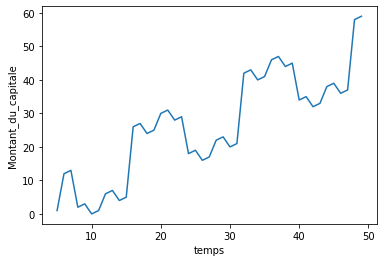

In [14]:
X = np.array(montant["Temps"]).reshape(len(montant["Montant_du_capitale"]),1)
y = np.array(montant["Montant_du_capitale"]).reshape(len(montant["Montant_du_capitale"]),1)
#print(X)
#print(y)
plt.plot(X, y)
plt.xlabel('temps')
plt.ylabel('Montant_du_capitale')
plt.show()

### 4.2 - Visualisation de données sous forme de nuage de points

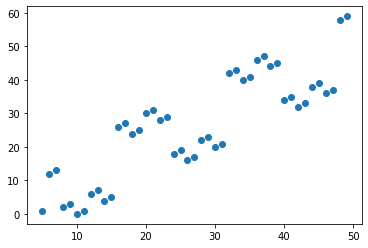

In [15]:
plt.scatter(X,y)

## 5 - Analyse de données

### 5.3 - Mesure de tendance centrale

In [16]:
tend = pd.read_csv('data/tendance_centrale.csv')
tend

,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50
5,Tillier,59,4.90
6,Blanchard,53,3.80
7,perez,34,3.78
8,théo,40,5.98
9,cyprien,30,4.80


In [17]:
tendm = tend.iloc[:,1:3]
tendmad = tendm['Age'].describe()
tendmrd = tendm['Rating'].describe()
print(tendmad)
print(tendmrd)

count    17.000000
mean     45.647059
std      10.723462
min      30.000000
25%      34.000000
50%      49.000000
75%      53.000000
max      59.000000
Name: Age, dtype: float64
count    17.000000
mean      4.438824
std       0.800390
min       3.500000
25%       3.800000
50%       4.300000
75%       4.800000
max       5.980000
Name: Rating, dtype: float64


In [18]:
tendm['Age'].median()

49.0

In [19]:
tendm['Rating'].median()

4.3

### 5.2 - Analyse de la variance

In [20]:
tendm['Age'].var()

114.99264705882352

In [21]:
tendm['Rating'].var()

0.640623529411765

In [22]:
tendm.var()

Age       114.992647
Rating      0.640624
dtype: float64

### 5.3 -  Analyse de corrélations

In [24]:
iris = pd.read_csv('data/iris.csv')
iris

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal,espèce
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [25]:
iris.corr(method = "pearson")

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal
longueur_sepal,1.000000,-0.117570,0.871754,0.817941
largeur_sepal,-0.117570,1.000000,-0.428440,-0.366126
longueur_petal,0.871754,-0.428440,1.000000,0.962865
largeur_petal,0.817941,-0.366126,0.962865,1.000000


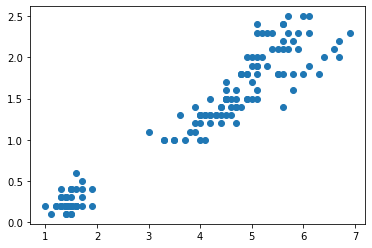

In [26]:
plt.scatter(iris["longueur_petal"],iris["largeur_petal"])

liaison lineraire positive

In [27]:
iris["longueur_petal"].corr(iris["largeur_petal"])

0.9628654314027961

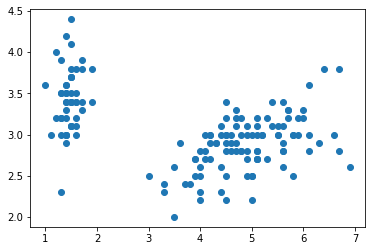

In [28]:
plt.scatter(iris["longueur_petal"],iris["largeur_sepal"])